# Лабораторная работа №3
## Наивный Байесовский классификатор

In [1]:
import os, sys
sys.path.append(os.getcwd())

import numpy as np
import pandas as pd
import warnings
import time
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from Bayes import GaussianNaiveBayes
from CrossValidator import CrossValidation
from graph import decision_boundary_plot

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
cols = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
df = pd.read_csv(url, header=None, names=cols).drop("Id", axis=1)
df.to_csv("glass.csv", index=False)

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df = pd.read_csv("glass.csv")
X = df.iloc[:, :-1]
y = pd.Series(LabelEncoder().fit_transform(df["Type"]), name="Type")
print(X.shape, y.unique())

(214, 9) [0 1 2 3 4 5]


Наивный гауссовский классификатор основывается на теореме Байеса

In [4]:
cv = CrossValidation(n_splits=5)

def measure(clf, X, y):
    t0 = time.time()
    acc = cv.eval(X, y, clf, accuracy_score)
    f1  = cv.eval(X, y, clf, f1_score)
    return acc.mean(), f1.mean(), time.time() - t0

def run_all():
    hand = GaussianNaiveBayes()
    skl  = GaussianNB()

    acc_h, f1_h, t_h = measure(hand, X, y)
    acc_s, f1_s, t_s = measure(skl,  X, y)

    scaler = StandardScaler()
    X_s = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    y_s = y.copy()
    acc_h_s, f1_h_s, t_h_s = measure(hand, X_s, y_s)
    acc_s_s, f1_s_s, t_s_s = measure(skl,  X_s, y_s)

    res = pd.DataFrame([
        ["Hand-NB (raw)",     acc_h,   f1_h,   t_h],
        ["sklearn NB (raw)",  acc_s,   f1_s,   t_s],
        ["Hand-NB (scaled)",  acc_h_s, f1_h_s, t_h_s],
        ["sklearn NB (scaled)", acc_s_s, f1_s_s, t_s_s],
    ], columns=["Method","Accuracy","F1-macro","Train time (s)"])
    display(res)

run_all()

,Method,Accuracy,F1-macro,Train time (s)
0,Hand-NB (raw),0.474327,0.459342,0.140028
1,sklearn NB (raw),0.469565,0.434922,0.039031
2,Hand-NB (scaled),0.474327,0.455374,0.108009
3,sklearn NB (scaled),0.469565,0.434922,0.040008


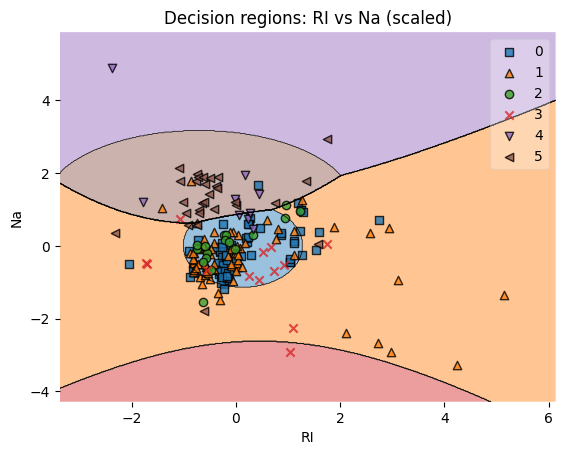

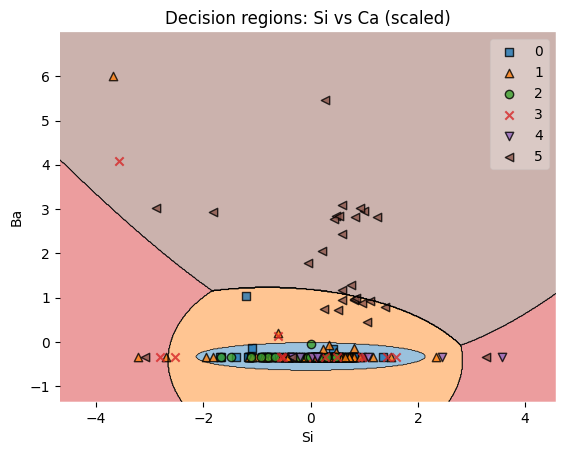

In [5]:
scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y_s = y.copy()

decision_boundary_plot(
    X_s, y_s, X_s, y_s, GaussianNB(), feature_indexes=[0,1],
    title="Decision regions: RI vs Na (scaled)"
)

decision_boundary_plot(
    X_s, y_s, X_s, y_s, GaussianNB(), feature_indexes=[4,7],
    title="Decision regions: Si vs Ca (scaled)"
)